## Importing liberaries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("dataset.csv")
df_copy = df.copy()

In [3]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,NaN,Yes,No,NaN,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,NaN,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [4]:
df.drop("customerID",axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7000 non-null float64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              6896 non-null float64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(4), object(16)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()

gender                0
SeniorCitizen        43
Partner               0
Dependents            0
tenure              147
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          0
Churn                 0
dtype: int64

### As we See SeniorCitizen and tenure contain missing values 


# Feature Engineering

In [7]:
print(df_copy['Churn'].unique())
print(df_copy['Partner'].unique())
print(df_copy['Dependents'].unique())
print(df_copy['OnlineSecurity'].unique())
print(df_copy['TechSupport'].unique())
print(df_copy['StreamingTV'].unique())
print(df_copy['DeviceProtection'].unique())
print(df_copy['TechSupport'].unique())
print(df_copy['DeviceProtection'].unique())
print(df_copy['TechSupport'].unique())

['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']


In [8]:


df.loc[df.Partner=='No' ,'Partner'] = 0   
df.loc[df.Partner=='No internet service','Partner'] = 0    
df.loc[df.Partner=='Yes','Partner'] = 1   

df.loc[df.Dependents=='No','Dependents'] = 0    
df.loc[df.Dependents=='No internet service','Dependents'] = 0   
df.loc[df.Dependents=='Yes','Dependents'] = 1   

df.loc[df.PhoneService=='No','PhoneService'] = 0     
df.loc[df.PhoneService=='No internet service','PhoneService'] = 0  
df.loc[df.PhoneService=='Yes','PhoneService'] = 1    

df.loc[df.OnlineSecurity=='No','OnlineSecurity'] = 0  
df.loc[df.OnlineSecurity=='No internet service','OnlineSecurity'] = 0     
df.loc[df.OnlineSecurity=='Yes','OnlineSecurity'] = 1   

df.loc[df.TechSupport=='No','TechSupport'] = 0    
df.loc[df.TechSupport=='No internet service','TechSupport'] = 0   
df.loc[df.TechSupport=='Yes','TechSupport'] = 1  

df.loc[df.StreamingTV=='No','StreamingTV'] = 0    
df.loc[df.StreamingTV=='No internet service','StreamingTV'] = 0   
df.loc[df.StreamingTV=='Yes','StreamingTV'] = 1   

df.loc[df.DeviceProtection=='No','DeviceProtection'] = 0   
df.loc[df.DeviceProtection=='No internet service','DeviceProtection'] = 0    
df.loc[df.DeviceProtection=='Yes','DeviceProtection'] = 1    


df.loc[df.TechSupport=='No','TechSupport'] = 0    
df.loc[df.TechSupport=='No internet service','TechSupport'] = 0   
df.loc[df.TechSupport=='Yes','TechSupport'] = 1   

df.loc[df.StreamingMovies=='No','StreamingMovies'] = 0    
df.loc[df.StreamingMovies=='No internet service','StreamingMovies'] = 0   
df.loc[df.StreamingMovies=='Yes','StreamingMovies'] = 1   

df.loc[df.Churn=='No' ,'Churn'] = 0     
df.loc[df.Churn=='No internet service','Churn'] = 0  
df.loc[df.Churn=='Yes','Churn'] = 1    

In [9]:
print(df['Churn'].unique())
print(df['Partner'].unique())
print(df['Dependents'].unique())
print(df['OnlineSecurity'].unique())
print(df['TechSupport'].unique())
print(df['StreamingTV'].unique())
print(df['DeviceProtection'].unique())
print(df['TechSupport'].unique())
print(df['DeviceProtection'].unique())
print(df['TechSupport'].unique())

[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]


# Handling Missing values in SeniorCitizen and tenure columns

In [10]:
df_copy.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7000.000000,6896.000000,7043.000000,7043.000000
mean,0.163143,33.041473,64.761692,2283.300440
std,0.369522,24.382260,30.090047,2265.000258
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,10.000000,35.500000,402.225000
50%,0.000000,30.000000,70.350000,1400.550000
75%,0.000000,56.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
print(df_copy['SeniorCitizen'].unique())
print(df_copy['tenure'].unique())

[nan  1.  0.]
[nan 34.  2. 45.  8. 22. 10. 28. 62. 13. 16. 58. 49. 25. 69. 52. 71. 21.
 12. 30. 47. 72. 17. 27.  5. 46. 11. 70. 63. 43. 15. 60. 18. 66.  9.  3.
 31. 50. 64. 56.  7. 42. 35. 48. 29. 65. 38. 68. 32. 55. 37. 36. 41.  6.
  4. 33. 67. 23. 57. 61. 14. 20. 53. 40. 59. 24. 44. 19. 54. 51. 26. 39.
  1.]


In [12]:
SeniorCitizen_mode = (df.SeniorCitizen.mode()[0])
df['SeniorCitizen'].fillna(SeniorCitizen_mode, inplace=True)
print('Sum of null values SeniorCitizen : ',df.SeniorCitizen.isnull().sum())

# do the same to tenure
tenure_mode = (df.tenure.mode()[0])
df['tenure'].fillna(tenure_mode, inplace=True)
print('Sum of null values tenure: ',df.tenure.isnull().sum())

Sum of null values SeniorCitizen :  0
Sum of null values tenure:  0


In [13]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0.0,1,0,1.0,0,No phone service,DSL,0,Yes,0,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0.0,0,0,34.0,1,No,DSL,1,No,1,0,0,0,One year,No,Mailed check,56.95,1889.50,0
2,Male,0.0,0,0,2.0,1,No,DSL,1,Yes,0,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0.0,0,0,45.0,0,No phone service,DSL,1,No,1,1,0,0,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0.0,0,0,2.0,1,No,Fiber optic,0,No,0,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,1


## Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
obj_cols=[]
for i in df.columns:
    if df[i].dtype == "object":
        print("( ",i," )","Unique values are:",df[i].unique())
        print("--------------------------------------------")
        obj_cols.append(i)
print(obj_cols)

(  gender  ) Unique values are: ['Female' 'Male']
--------------------------------------------
(  MultipleLines  ) Unique values are: ['No phone service' 'No' 'Yes']
--------------------------------------------
(  InternetService  ) Unique values are: ['DSL' 'Fiber optic' 'No']
--------------------------------------------
(  OnlineBackup  ) Unique values are: ['Yes' 'No' 'No internet service']
--------------------------------------------
(  Contract  ) Unique values are: ['Month-to-month' 'One year' 'Two year']
--------------------------------------------
(  PaperlessBilling  ) Unique values are: ['Yes' 'No']
--------------------------------------------
(  PaymentMethod  ) Unique values are: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
--------------------------------------------
['gender', 'MultipleLines', 'InternetService', 'OnlineBackup', 'Contract', 'PaperlessBilling', 'PaymentMethod']


## Let's Encode Some columns

In [16]:
gender_labels= LabelEncoder()
MultipleLines_labels = LabelEncoder()
InternetService_labels = LabelEncoder()
OnlineBackup_labels = LabelEncoder()
Contract_labels = LabelEncoder()
PaperlessBilling_labels = LabelEncoder()
PaymentMethod_labels = LabelEncoder()

In [17]:
df['gender']       =gender_labels.fit_transform(df['gender'])
df['MultipleLines']=MultipleLines_labels.fit_transform(df['MultipleLines'])
df['InternetService']=InternetService_labels.fit_transform(df['InternetService'])
df['OnlineBackup']=OnlineBackup_labels.fit_transform(df['OnlineBackup'])
df['Contract']=Contract_labels.fit_transform(df['Contract'])
df['PaperlessBilling']=PaperlessBilling_labels.fit_transform(df['PaperlessBilling'])
df['PaymentMethod']=PaymentMethod_labels.fit_transform(df['PaymentMethod'])

In [18]:
df.head(6)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0.0,1,0,1.0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0.0,0,0,34.0,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0.0,0,0,2.0,1,0,0,1,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0.0,0,0,45.0,0,1,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0.0,0,0,2.0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
5,0,0.0,0,0,8.0,1,2,1,0,0,1,0,1,1,0,1,2,99.65,820.50,1


## Now Our Dataframe is clean Let's get some correlations

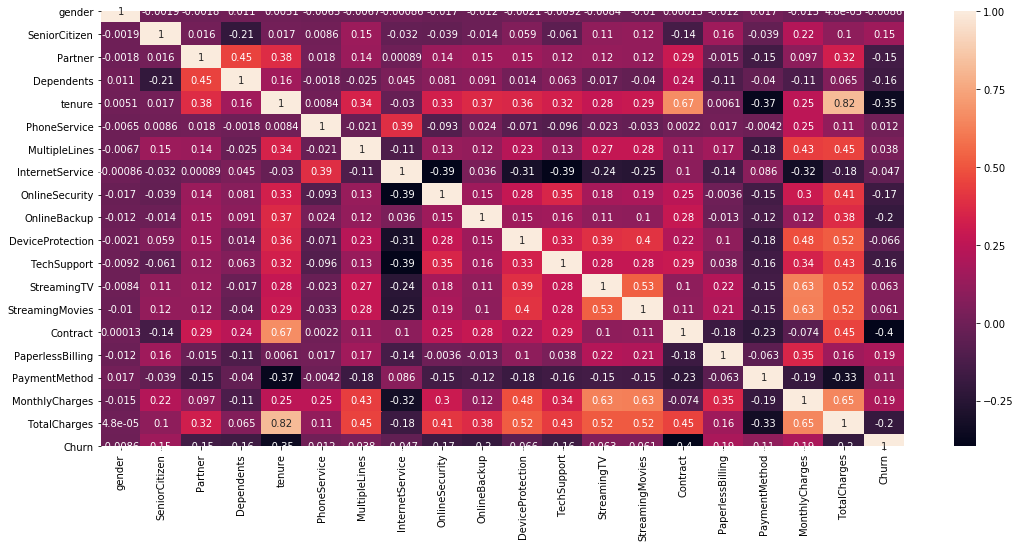

In [19]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(),annot=True);

## AS we see the features that have the most correlation are {SeniorCitizen,PaperlessBilling,PaymentMethod,MonthlyCharges,StreamingTv,StreamingMovies,PhoneService,MultipleLines} So we Drop the others

In [20]:
columns_need = ["SeniorCitizen","PaperlessBilling","PaymentMethod","MonthlyCharges","StreamingTV","StreamingMovies","PhoneService","MultipleLines","Churn","TotalCharges"]
#print(type(columns_need))
for i in df.columns:
    if i not in columns_need:
        df.drop(str(i),axis=1,inplace=True)
df.head(5)

,SeniorCitizen,PhoneService,MultipleLines,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1,0,0,1,2,29.85,29.85,0
1,0.0,1,0,0,0,0,3,56.95,1889.50,0
2,0.0,1,0,0,0,1,3,53.85,108.15,1
3,0.0,0,1,0,0,0,0,42.30,1840.75,0
4,0.0,1,0,0,0,1,2,70.70,151.65,1


## We Now Doing scale for MonthlyCharges

In [21]:
from sklearn.preprocessing import StandardScaler,Normalizer
sc_MonthlyCharges = StandardScaler()
df["MonthlyCharges"]=sc_MonthlyCharges.fit_transform(df["MonthlyCharges"].values.reshape(-1,1))
df.head(5)

,SeniorCitizen,PhoneService,MultipleLines,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1,0,0,1,2,-1.160323,29.85,0
1,0.0,1,0,0,0,0,3,-0.259629,1889.50,0
2,0.0,1,0,0,0,1,3,-0.362660,108.15,1
3,0.0,0,1,0,0,0,0,-0.746535,1840.75,0
4,0.0,1,0,0,0,1,2,0.197365,151.65,1


In [22]:
df_copy.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,NaN,Yes,No,NaN,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,NaN,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,NaN,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,NaN,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,NaN,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [23]:
df_copy.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7000.000000,6896.000000,7043.000000,7043.000000
mean,0.163143,33.041473,64.761692,2283.300440
std,0.369522,24.382260,30.090047,2265.000258
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,10.000000,35.500000,402.225000
50%,0.000000,30.000000,70.350000,1400.550000
75%,0.000000,56.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


## (discretization) of TotalCharges

In [24]:
df.insert(8, 'TotalCharges_Category', 'default value')

In [25]:

for i in range(len(df)): 
    if df["TotalCharges"][i] <= 402.225000 and df["TotalCharges"][i] >= 0: 
        df.TotalCharges_Category[i]="1st Quartile"
  
    elif df["TotalCharges"][i] <= 1400.550000 and df["TotalCharges"][i]  >=402.225000:
        df.TotalCharges_Category[i]="2nd Quartile"
  
    elif df["TotalCharges"][i] >= 1400.550000:
        df.TotalCharges_Category[i]="3rd Quartile"
  


#### Now Drop TotalCharges column

In [26]:
df.drop("TotalCharges",axis=1,inplace=True)

In [27]:
df.head(5)

,SeniorCitizen,PhoneService,MultipleLines,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges_Category,Churn
0,0.0,0,1,0,0,1,2,-1.160323,1st Quartile,0
1,0.0,1,0,0,0,0,3,-0.259629,3rd Quartile,0
2,0.0,1,0,0,0,1,3,-0.362660,1st Quartile,1
3,0.0,0,1,0,0,0,0,-0.746535,3rd Quartile,0
4,0.0,1,0,0,0,1,2,0.197365,1st Quartile,1


### Some Visualizations

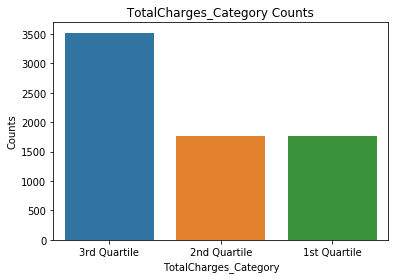

In [28]:
df_TotalCharges_Category = dict(df['TotalCharges_Category'].value_counts())
names = list(df_TotalCharges_Category.keys())
values = list(df_TotalCharges_Category.values())
plt.title(' TotalCharges_Category Counts ')
plt.xlabel('TotalCharges_Category')
plt.ylabel('Counts')
sns.barplot(names, values);

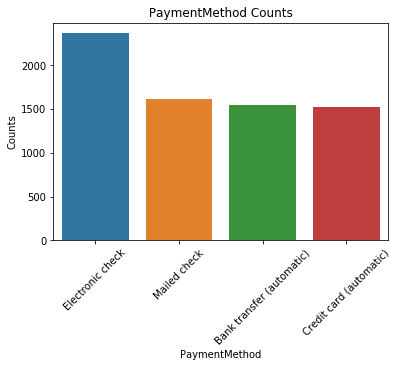

In [29]:
df_PaymentMethod = dict(df_copy['PaymentMethod'].value_counts())
names = list(df_PaymentMethod.keys())
values = list(df_PaymentMethod.values())
plt.title(' PaymentMethod Counts ')
plt.xticks(rotation=45)
plt.xlabel('PaymentMethod')
plt.ylabel('Counts')
sns.barplot(names, values);

# Questions

# 1. Number of Male customers that churned from the company

In [40]:
#print(df_copy.query('gender == "Male" and Churn == "Yes"'))
print("Q1 Answer:   ",len(df_copy.query('gender == "Male" and Churn == "Yes"')))

Q1 Answer:    930


# 2. Male to Female ratio

In [51]:
print("Number of Males   :   ",df_copy.gender.str.count('Male').sum())
print("Number of Females :   ",df_copy.gender.str.count('Female').sum())
males = df_copy.gender.str.count('Male').sum()
females = df_copy.gender.str.count('Female').sum()
print('Ratio (males/females) = ', males/females)

Number of Males   :    3555
Number of Females :    3488
Ratio (males/females) =  1.0192087155963303


# 3. Churned to Stayed ratio

In [58]:
df_copy['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [59]:
churned = df_copy['Churn'].value_counts()[1]
stayed = df_copy['Churn'].value_counts()[0]
print('Number of customers Churned:', churned , '\n' + 'Number of customers stayed:', stayed)
print('Ratio (churned/stayed)=', churned/stayed)

Number of customers Churned: 1869 
Number of customers stayed: 5174
Ratio (churned/stayed)= 0.36122922303826827


# 4. Number of Senior citizens who churned from our company

In [62]:
len(df.query('SeniorCitizen == 1.0 and Churn == "1"'))


476

# 5. Get the ID of the biggest total charges customer

In [65]:
df_copy['customerID'][df_copy['TotalCharges'] == df_copy['TotalCharges'].max()]

4610    2889-FPWRM
Name: customerID, dtype: object

# 6. Correlation between Monthly and Total Charges

In [36]:
df_copy.corr()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.013521,0.221101,0.102831
tenure,0.013521,1.000000,0.238635,0.822171
MonthlyCharges,0.221101,0.238635,1.000000,0.650468
TotalCharges,0.102831,0.822171,0.650468,1.000000


Text(0.5, 1.0, 'Relation between Monthly and Total Charges')

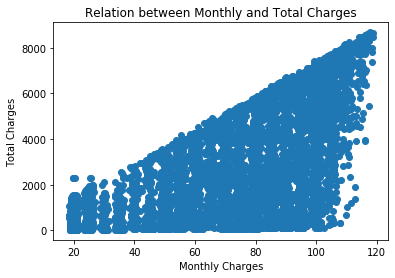

In [37]:

plt.scatter(df_copy['MonthlyCharges'], df_copy['TotalCharges'])
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.title('Relation between Monthly and Total Charges')

# 7.  Average payment per month for all users

In [38]:
df_copy['MonthlyCharges'].mean()

64.76169246059918